# Gradient descent exploration

H"OFHO:BOWYOYUWT OIV HAHAHAHAHAHAHAHHAHAHAHAHA ohnonessnes

### Vanilla Gradient Descent

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# For animation
from IPython.display import display, clear_output


In [48]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate data with a linear relationship: y = 2.5x + 1.5 + noise
data_x = np.linspace(0, 10, 100)
true_slope = 2.5
true_intercept = 1.5
noise = np.random.normal(0, 1, 100)  # Add some noise
data_y = true_slope * data_x + true_intercept + noise

data_x = data_x/25
data_y=data_y/25

In [49]:
def gradient_descent_meta(data_x, data_y, iterations=500, learning_rate=0.05):
    """gradient_descent(data_x, data_y, iterations=1000, learning_rate=0.05) -> slope, intercept, mc, loss
    linear regression by using the gradient descent algorithm"""
    N = len(data_x)
    m, c = 0, 0  # initial values for m and c
    mc = []      # save the values of m and c for visualization only
    loss = []
    
    for _ in range(iterations):
        # Compute the current error
        y = data_x * m + c      # predicted value
        error =  data_y - y     # vector of differences between predicted and actual
        loss.append (np.sum(error**2)/N)
        
        # Compute the gradient using vectorized operations
        #minus cuz opposite of gradient
        dm = -2/N * np.dot(error, data_x)
        dc = -2/N * np.sum(error)
        
        # dm = -1*0.1*np.dot(error, data_x)
        # dc = -1*0.1*np.sum(error)


        # Update m and c
        m = m - dm * learning_rate
        c = c - dc * learning_rate
        
        # Save the current values of m and c
        mc.append((m, c))

    return m, c, mc, loss


In [50]:
slope, intercept,mc,loss = gradient_descent_meta(data_x, data_y)
print("Slope (m):", slope)
print("Intercept (c):", intercept)

Slope (m): 1.2637378072853018
Intercept (c): 0.30641022881645685


Text(0, 0.5, 'Loss')

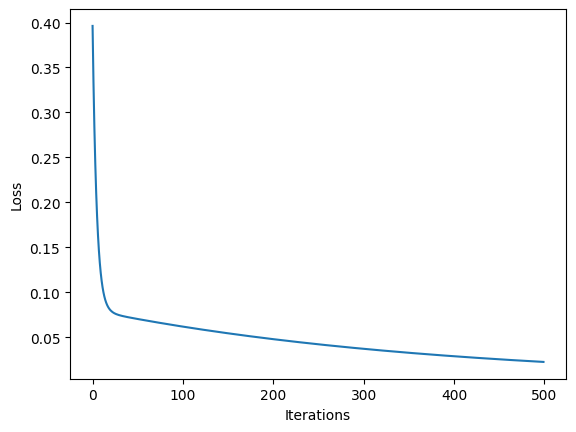

In [51]:
# The loss is decreasing with the number of iterations

plt.plot(loss)
plt.xlabel("Iterations")
plt.ylabel("Loss")


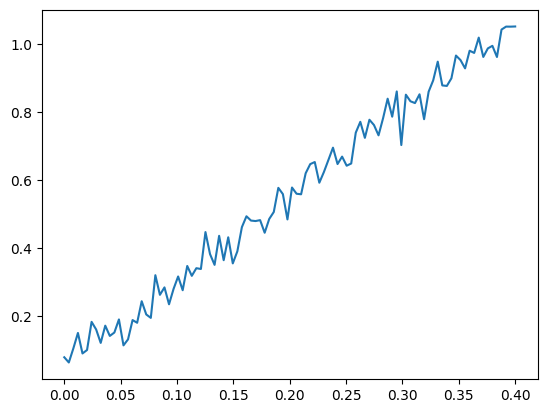

In [52]:
# The loss is decreasing with the number of iterations

plt.plot(data_x,data_y)



### Batch

https://www.geeksforgeeks.org/machine-learning/different-variants-of-gradient-descent/

### Stochastic gradient descent

https://en.wikipedia.org/wiki/Stochastic_gradient_descent

### Conjugate gradient method

https://en.wikipedia.org/wiki/Conjugate_gradient_method

https://en.wikipedia.org/wiki/Derivation_of_the_conjugate_gradient_method

instead of making uneducated steps of varying lentth (zigzag) we make 100% precise and educated steps, one in each dimension. educated steps do not interfere with each other cuz they are conjugate (perpendicular in high dimensions, they have 0 in common with each other)

In [53]:
import numpy as np

def conjugate_gradient(A, b, x0, tol=None):
    """
    Return the solution to `A * x = b` using the conjugate gradient method.
    Reminder: A should be symmetric and positive definite.
    
    Parameters:
    -----------
    A : ndarray
        Coefficient matrix (n x n), should be symmetric and positive definite
    b : ndarray
        Right-hand side vector (n,)
    x0 : ndarray
        Initial guess (n,)
    tol : float, optional
        Convergence tolerance (default: machine epsilon)
    
    Returns:
    --------
    x : ndarray
        Solution vector (n,)
    """
    if tol is None:
        tol = np.finfo(float).eps
    
    r = b - A @ x0
    p = r.copy()
    rsold = r @ r
    
    x = x0.copy()
    
    while np.sqrt(rsold) > tol:
        Ap = A @ p
        alpha = rsold / (p @ Ap)
        x = x + alpha * p
        r = r - alpha * Ap
        rsnew = r @ r
        p = r + (rsnew / rsold) * p
        rsold = rsnew
    
    return x

### Quasi-Newton method

https://en.wikipedia.org/wiki/Quasi-Newton_method